# Sound source localization with a microphones array : beamforming approaches

You have characterized and analyzed the sound propagation in the previous practical. We will now
exploit theses properties to infer one sound source position w.r.t.\ a linear microphone array made
of $N=8$ omnidirectional MEMS microphones. The system you will be using is the same as before;
thus, most of the code you already wrote to acquire signals, plot them, etc.\ will remain the same.

In all the following, the acquisition system will work with a sampling frequency $F_s = 20$kHz, and with a buffer of size $\texttt{BLK} = 2048$.

In [1]:
# All required import
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from client import array
import time
from beamformer_etu import beamformer

In [3]:
#antenne=array('server') # When performing real-time acquisition
antenne=array('play')   # When playing recorded files

In [60]:
# Load acquisition and array parameters from the antenne variable, after launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = 8
d = antenne.interspace

### 1) To begin, start the acquisition of the audio system, and capture one audio buffer. Plot the resulting signals as a function of time.

In [61]:
# Read an audio buffer
m = antenne.read()

# TE BE COMPLETED

## 2.1/ Coding the beamformer filters and analyzing their properties

**These first questions have to be prepared before the practical session**

### 2) Write the position $z_n$ as a function of $n$ and interspace $d$. As a convention, the first microphone number is selected as $0$.

One can write :
$$z_n = (n-\frac{N-1}{2})*d$$ 
(si N=8)

### 3) Propose a function $\texttt{beam\_filter}$ returning the filter frequency response for one microphone number $\texttt{mic\_nb}$. 

In [2]:
def beam_filter(array, freq_vector, theta0=0, mic_nb: int = 0):
    """Compute the filter frequency response of a DSB beamformer for one microphone

    Args:
        array (array_server obj): array structure controlling the acquisition system.
        freq_vector (np.array): frequency vector. 
        theta0 (int, optional): focusing angular direction (in degrees). Defaults to 0.
        mic_id (int, optional): microphone id. Defaults to 0.

    Returns:
        np.array: the filter frequency response. Shape is (len(freq_vector),).
    """

    N = 8
    d = array.interspace
    c=340
    # Microphone position x
    z = ( mic_nb - (N-1)/2)*d
    k= 2*np.pi*freq_vector/c # avec k le vecteur d'onde tq k = w/c
    # Filter's frequency response
    w= np.exp(-1j*k*z*np.cos(theta0*np.pi/180)) # le filtre est un simple déphasage
    return w

### 4) Plot the two frequency responses obtained for two filters associated to two different microphone outputs when $\theta_0=0^\circ $ and for frequencies between $ 0 $ and $ 5 $ kHz. Explain the effect of these filters on the signals.

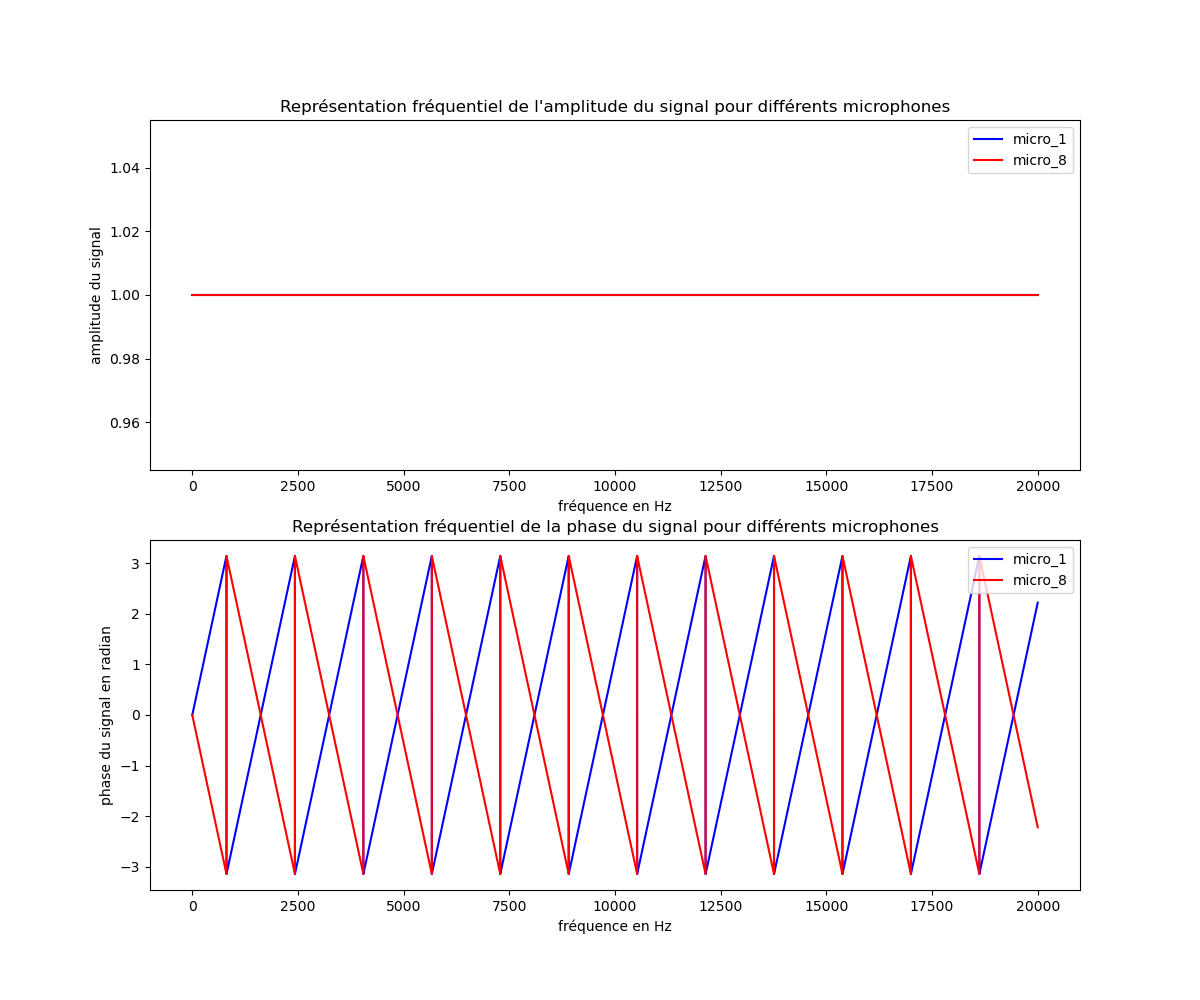

In [8]:
vect_f_p = np.linspace(0,Fs,100000)
wmic_0 = beam_filter(antenne, vect_f_p, theta0=0, mic_nb=0) # on applique le filtre pour le micro 1 avec theta0 = 0
wmic_7 = beam_filter(antenne, vect_f_p, theta0=0, mic_nb=7) # on applique le filtre pour le micro 8 avec theta0 = 0

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,10))
ax1.plot(vect_f_p,np.abs(wmic_0),color ="blue",label='micro_1')
ax1.plot(vect_f_p,np.abs(wmic_7),color ="red",label='micro_8')
ax1.set_xlabel('fréquence en Hz')
ax1.set_ylabel('amplitude du signal')
ax1.set_title("Représentation fréquentiel de l'amplitude du signal pour différents microphones")
ax1.legend(loc='upper right')
#ax1.set_xlim([freq_of_interest -50,freq_of_interest+50]) # on Zoom sur la fréquence du signal pur que l'on a envoyé 
ax2.plot(vect_f_p,np.angle(wmic_0),color ="blue",label='micro_1')
ax2.plot(vect_f_p,np.angle(wmic_7),color ="red",label='micro_8')
ax2.set_xlabel('fréquence en Hz')
ax2.set_ylabel('phase du signal en radian')
ax2.set_title("Représentation fréquentiel de la phase du signal pour différents microphones")
#ax2.set_xlim([freq_of_interest -50,freq_of_interest+50]) # on Zoom sur la fréquence du signal pur que l'on a envoyé 
ax2.legend(loc='upper right')
plt.show()



## Commentaire :
Nous observons tout d'abord que l'amplitude n'est pas modifiée. En effet, le filtre étant un déphaseur pur, il n'affecte pas l'amplitude des signaux. En revanche, pour ce qui est de la phase, nous constatons que le filtre à bien déphasé le signal entre le micro 1 et le micro 8.
En choisissant $ \theta_0 = 0 $ , le filtre est censé sélectionner les signaux alignés sur l'axe x (ie dont la propagation est parallèle au réseau) et provenant de "-x" (en référence à la figure 5 de l'énoncé). Ainsi, entre le 1er et le dernier micro, il applique un déphasage maximal de $ e^{-j*k*\frac{7}{2}} $ pour compenser le retard du signal arrivant au niveau du dernier micro qui vaut $ e^{+j*k*\frac{7}{2}} $ (et qui est le plus grand retard possible).

### 5) Compare again the filters obtained when $\theta_0 = 90^\circ$. Explain the differences.

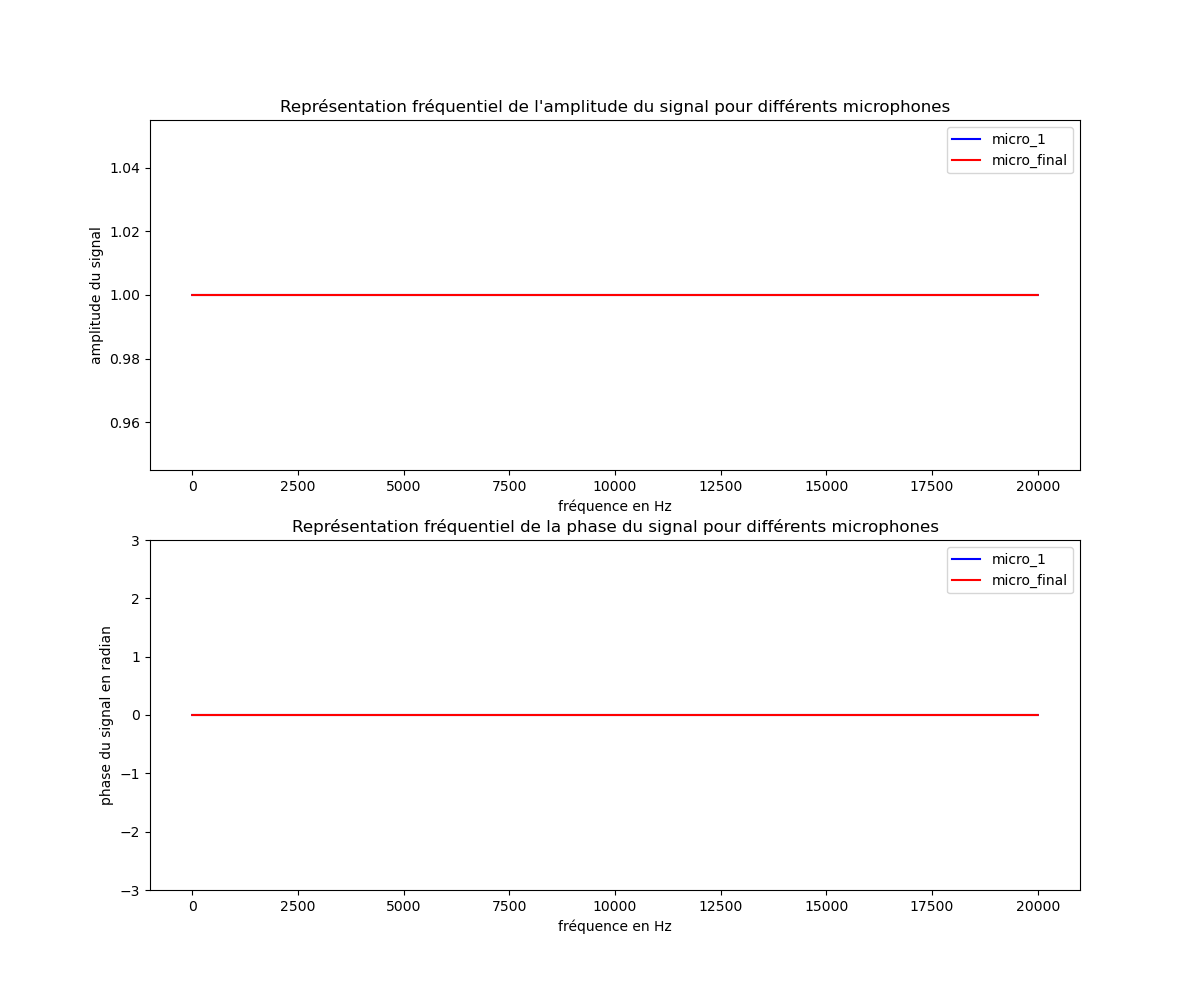

In [84]:
vect_f_p = np.linspace(0,Fs,100000)
wmic_0 = beam_filter(antenne, vect_f_p, theta0=90, mic_nb=0)
wmic_7 = beam_filter(antenne, vect_f_p, theta0=90, mic_nb=7)

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,10))
ax1.plot(vect_f_p,np.abs(wmic_0),color ="blue",label='micro_1')
ax1.plot(vect_f_p,np.abs(wmic_7),color ="red",label='micro_final')
ax1.set_xlabel('fréquence en Hz')
ax1.set_ylabel('amplitude du signal')
ax1.set_title("Représentation fréquentiel de l'amplitude du signal pour différents microphones")
ax1.legend(loc='upper right')
#ax1.set_xlim([freq_of_interest -50,freq_of_interest+50]) # on Zoom sur la fréquence du signal pur que l'on a envoyé 
ax2.plot(vect_f_p,np.angle(wmic_0),color ="blue",label='micro_1')
ax2.plot(vect_f_p,np.angle(wmic_7),color ="red",label='micro_final')
ax2.set_xlabel('fréquence en Hz')
ax2.set_ylabel('phase du signal en radian')
ax2.set_title("Représentation fréquentiel de la phase du signal pour différents microphones")
ax2.set_ylim([-3,3]) # on Zoom sur la fréquence du signal pur que l'on a envoyé 
ax2.legend(loc='upper right')
plt.show()


## Commentaire :
Lorsque $ \theta_0 = 90° $ , nous somme dans le cas où le front d'onde arrive "en face" du réseau, ie perpendiculairement à l'axe x. Dans cette situation (si l'on est bien dans le cas où la source est à l'infini et où les fronts d'onde arrivant au niveau du réseau sont plans), le signal est détecté par chaque micro en même temps, ce qui implique qu'il n'y a aucun retard, la réception se fait simultanément pour tout le réseau. Et ainsi, les filtres sont des fonctions identité. On constate en effet sur les figures ci-dessus que l'amplitude vaut 1 et la phase est nulle ce qui implique que le filtre est bien la fonction identité.

## 2.2/ Using the filters : coding of the beamforming
Basically, the beamforming algorithm is the following :

- (a) acquire an audio frame
- (b) compute the corresponding FFT
- (c) analyze the FFT to define which frequency(ies) you would like to localize
- (d) restrict the FFT to the frequencies of interest
- (e) for one given $ \theta_0 $ , for the frequencies selected before, and for each microphone :
  * compute the corresponding filters frequency responses with the beam_filter function
  * apply these filters to the microphone outputs
- (f) compute the beamformer output associated to the angular polarization $ \theta_0 $
- (g) repeat all these last steps for each $ \theta_0 $ you want to test
- (h) finally, decide of the angular position of the source by detecting for which $ \theta_0 $ the beam-
former output is maximum.

### 6) Step (a) and (b) : After acquiring an audio buffer, compute its FFT in an array $\texttt{M\_fft}$. Plot the result of this analysis as a function of the frequency when emitting a pure sine tone with a frequency $ F_0 = 1 $ kHz.

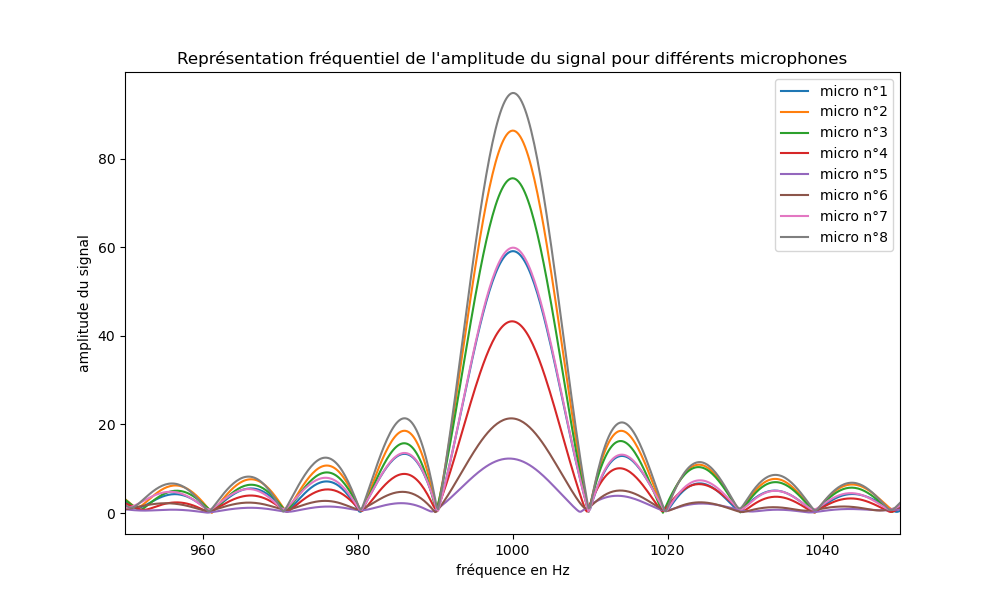

In [83]:
# On récupère et on plot la FFT du signal pour chaque microphone

plt.clf()
M_fft=[]
freq =[]
M=[]
for i in range(N): 
    fft_discretem= np.fft.fft(m[:,i],100000) # FFT du signal pour chaque micro
    M_fft.append(fft_discretem)
    freq.append(np.argmax((np.abs(M_fft[i]))[4000:6000]))
    M.append((M_fft[i])[5000])

freq_imp=5*vect_f_p[freq[0]]

freq_of_interest=1000
fig,ax1 = plt.subplots(figsize=(10,6))
for j in range(N):
    ax1.plot(vect_f_p,np.abs(M_fft[j]), label = 'micro n°%s' %(j+1))
    ax1.set_xlim([freq_of_interest -50,freq_of_interest+50]) # on Zoom sur la fréquence du signal pur que l'on a envoyé 

ax1.set_xlabel('fréquence en Hz')
ax1.set_ylabel('amplitude du signal')
ax1.set_title("Représentation fréquentiel de l'amplitude du signal pour différents microphones")
ax1.legend()

    
plt.show()


## Commentaire : 
On constate que le pic d'amplitude maximale est centré sur $ 1k Hz $ pour tous les micros. Ce qui est cohérent 

In [63]:
print(freq_imp)
indexf = 5000

1000.010000100001


On veut garder le pic principale donc fréquence entre 990 et 1010 ? 

### 7) Step (c) and (d) : Among all the frequencies you obtained from the FFT, select the one corresponding to the source frequency. Give its exact value and index $k_0$ in the frequency array, and collect the corresponding FFT values of each microphone outputs in one vector $\texttt{M}$ of length $N$.

In [86]:
#print(freq_imp)
indexf = 5000
print(M)
print(len(M))

[(51.47889563651931+29.088590288211073j), (70.28429690123703+50.17100827439607j), (56.15455973163165+50.602920564093715j), (27.84420380023689+33.139738965341124j), (8.192540702807428+9.11289411809336j), (20.70498431930914+5.236965616503827j), (54.10780667611712+25.730791884526102j), (80.80620512916242+49.65961145453046j)]
8


### Commentaire :
On récupère bien dans le vecteur M la valeur max de l'amplitude du signal reçu pour chaque micro.

### 8) Step (e) : In a loop among all microphones, compute each filters for the position $\theta_0$ and for the frequency value you obtained in the previous step. Apply then these filters to the array $\texttt{M}$ defined before.

In [65]:
S=[]
for k in range(N):
    wmic = beam_filter(antenne, freq_imp, theta0=0, mic_nb=k) # on applique le filtre pour chaque micro avec theta0 = 0
    Mk=M[k]
    S.append(Mk*wmic)
    

### $ 9) \textbf{Step (f):} $ Combine then the filters outputs to form the beamformer output $Y_{\theta_0}[k_0]$. *$Y_{\theta_0}[k_0]$ is obviously a complex value which corresponds to the frequency contribution of the source to the $k_0^{\text{th}}$ frequency component of the beamformer output when focalized in the direction $\theta_0$.* Compute then the corresponding power $P(\theta_0)$ at $k_0$ of the beamformer output.

In [66]:
Y = np.sum(S) # on somme les signaux filtrés pour trouver Y
P = np.abs(Y)**2 # on calcule la puissance du signal sommé
print(P)

74011.66565898391


### Commentaire :
La puissance du signal obtenue est complexe à interpréter telle quelle. L'idée sera plutôt de comparer les puissance obtenues pour différentes orientations ie différentes valeurs de $ \theta_0 $ . C'est la différence de puissance qui va nous intéresser et qui sera un indicateur de la présence de la source.

### 10) For a direction $\theta_0$ of your choice, compute $P(\theta_0)$ for (i) a source emitting from a direction close to $\theta_0$, or (ii) far from it. Compare the two values.

In [ ]:
# For theta0 = 90°

#ThetaS = 0°
#P = 551572

#ThetaS = 90°
#P=200463

In [ ]:
# For theta0 = 0°

#ThetaS = 0°
#P = 258000

#ThetaS = 90°
#P = 74012

### Commentaire :
Pour $ \theta_0 = 90° $ , la valeur de la puissance du signal reçu est 2,75 fois plus grande lorsque la source est loin de cette orientation ( $ \theta_s = 0° $ ) que lorsqu'elle est dans la même orientation ( $ \theta_0 = \theta_s = 90° $ ), ce qui n'est absolument pas logique. Nous attribuons cette incohérence au fait que le milieu d'étude, ie la salle de TP est loin d'être idéal : beaucoup d'interférences, d'obstacles...

En revanche, pour $ \theta_0 = 0° $ , la valeur de la puissance du signal reçu est 3,5 fois plus grande lorsque la source a la même orientation ( $ \theta_0 = \theta_s = 0° $ ) que lorsque la source est loin de cette orientation ( $ \theta_s = 90° $ ). Ce qui cette fois-ci est cohérent puisque notre réseau est censé filtrer les signaux et ne laisser passer que les signaux dont l'orientation est similaire à celle sélectionnée ( $ \theta_0 $). Les filtres agissant comme des déphaseurs et annulant le retard induit par cette direction particulière.

### 11) Step (g) : Repeat now the previous code in a loop for $\theta_0$ values ranging from 0 to 180° .You should then obtain an array $\texttt{P}$ where each value corresponds to the power of the beamformer output at $F_0$ for each angular polarization. Plot the array $\texttt{P}$ as a function of the angle $\theta_0$.

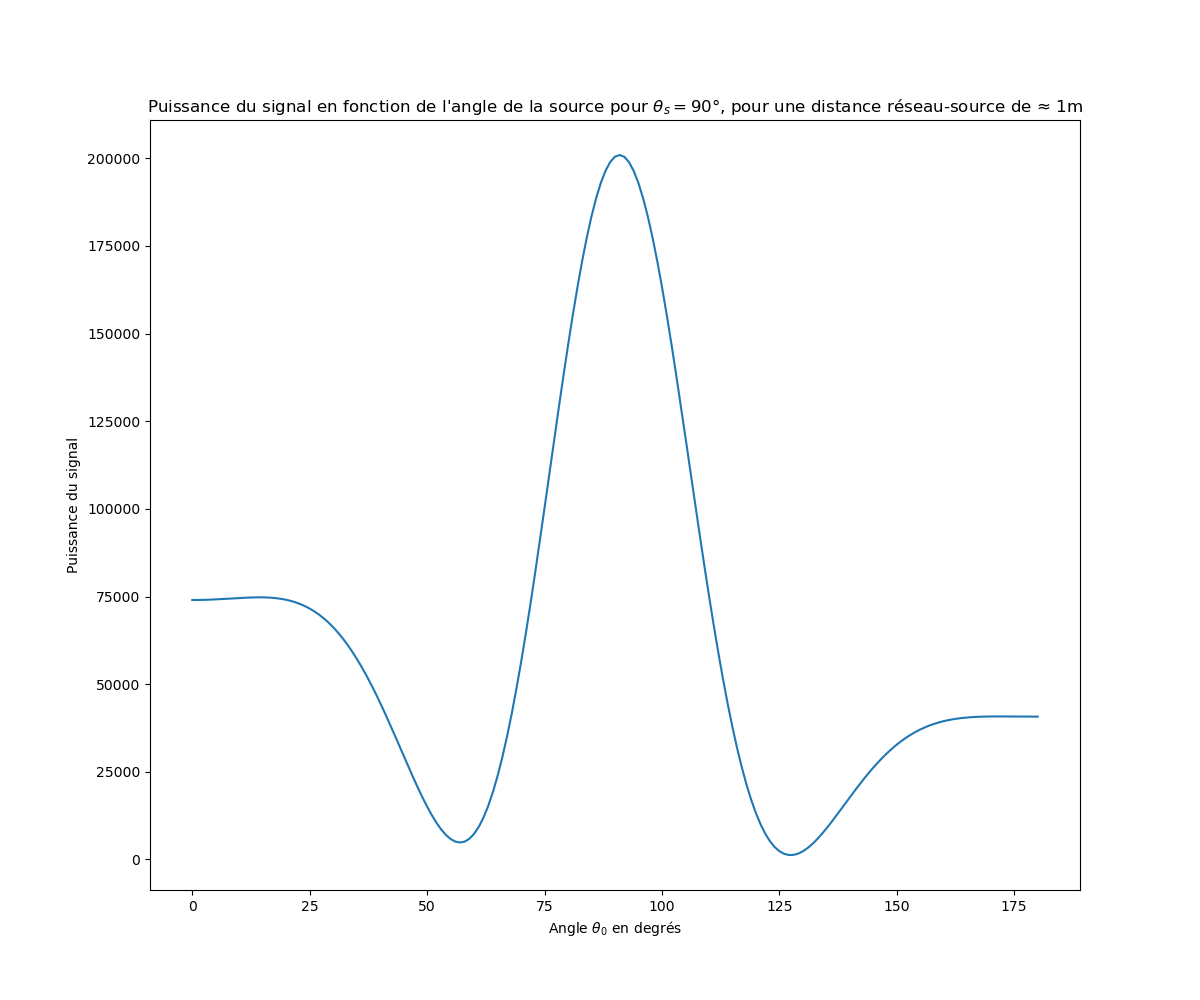

In [85]:
P_buffer=[]
plt.clf()
for l in range(0,181,1):
    S=[]
    for k in range(N):
        wmic = beam_filter(antenne, freq_imp, theta0=l, mic_nb=k)
        Mk=M[k]
        S.append(Mk*wmic)
    Y = np.sum(S)
    P = np.abs(Y)**2
    P_buffer.append(P)

vect_P = np.linspace(0, 180, 181)
plt.plot(vect_P, P_buffer)
plt.xlabel('Angle $\\theta_0$ en degrés')
plt.ylabel('Puissance du signal')
plt.title('Puissance du signal en fonction de l\'angle de la source pour $\\theta_s = 90°$, pour une distance réseau-source de ≈ 1m')
plt.show()

    

### 12) Step (h) : Find the $\theta_0$ value corresponding to position of the maximum in $\texttt{P}$ and compare it with the actual (but approximate) position of the sound source.

In [59]:
thetmax= vect_P[np.argmax(P_buffer)]
print(thetmax)

83.0


### Commentaire (Q11 & 12):
Nous constatons que la méthode semble marcher relativement bien puisque nous voyons apparaître un pic de puissance très net dans la direction 91°, ie la direction dans laquelle nous avons placé notre source, à 1° près (peut-être n'est-ce qu'un coup de chance). On remarque en revanche une augmentation de la puissance aux extrémités de $ \theta_0 $, qui sont probablement des interférences dûes aux bruits ambiants dans la salle de TP.

## 2.3/ Analyzing the beamformer performances

From now on, you can use your own code written in Section 2.2, or use the provided beamformer function which exactly reproduces the beamformer algorithm. You might then add $\texttt{from beamformer\_etu import beamformer}$ in your Notebook before being able to use the beamformer function.

In [37]:
from beamformer_etu import beamformer

### 13) Plot the energy maps you obtain when using source frequencies $ F_0 = 400 $ Hz, $ F_0 = 1 $ kHz, $ F_0 = 2 $ kHz and $ F_0 = 4 $ kHz emitting from a fixed arbitrary position. Comment and explain carefully the differences between these curves

In [38]:
F0 = 1000
vect_P = np.linspace(0, 180, 181)
beamformer(m, vect_P, F0, Fs)

array([  4658.50284122,   4663.91351586,   4680.19418731,   4707.49074875,
         4746.04618936,   4796.20033924,   4858.3895008 ,   4933.14595503,
         5021.09732823,   5122.96580123,   5239.56714083,   5371.80952997,
         5520.69217078,   5687.30363213,   5872.81991151,   6078.50217875,
         6305.694168  ,   6555.8191828 ,   6830.37667869,   7130.93838698,
         7459.1439436 ,   7816.6959875 ,   8205.35469404,   8626.93171054,
         9083.28346324,   9576.30380802,  10107.91600047,  10680.06396525,
        11294.70284943,  11953.78885008,  12659.26831263,  13413.06610353,
        14217.07326802,  15073.1339925 ,  15983.03189943,  16948.47571234,
        17971.08433812,  19052.37142434,  20193.7294596 ,  21396.41349597,
        22661.52458324,  23989.99301562,  25382.56150219,  26839.76838277,
        28361.93102043,  29949.12951139,  31601.1908611 ,  33317.67378252,
        35097.85427912,  36940.71217912,  38844.91879152,  40808.825855  ,
        42830.45595111,  

Some comments

### 14) For a frequency $ F_0 = 1 $ kHz and a source moving aroud the array, plot the estimated position as a function of time. Comment the effectiveness of the approach and its limits.

In [ ]:
# TO BE COMPLETED

Some comments